# 📕 02 - ShallowNet

In [24]:
%reload_ext autoreload
%autoreload 2

# import the necessary packages
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
import tensorflow as tf
from tensorflow import keras
from keras.optimizers import SGD
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report
from sigmoidal.nn import ShallowNet
from sigmoidal.datasets import SimpleDatasetLoader
from sigmoidal.preprocessing import SimplePreprocessor
from sigmoidal.preprocessing import ImageToArrayPreprocessor
from src.paths import DATA_DIR, MODEL_DIR

In [10]:
DATA_ANIMALS = DATA_DIR / 'animals'

sp = SimplePreprocessor(32, 32)
aip = ImageToArrayPreprocessor()

In [11]:
sdl = SimpleDatasetLoader(preprocessors=[sp, aip])
(data, labels) = sdl.load(DATA_ANIMALS, verbose=500)
data = data.astype('float') / 255.0

Loading images: 100%|██████████| 3000/3000 [00:08<00:00, 337.07it/s]


In [12]:
# partition the data into training and testing splits
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.25, random_state=42) 

In [13]:
y_train

array(['panda', 'dogs', 'cats', ..., 'cats', 'cats', 'dogs'], dtype='<U5')

In [15]:
# convert the labels from integers to vectors
y_train = LabelBinarizer().fit_transform(y_train)
y_test = LabelBinarizer().fit_transform(y_test)

In [18]:
# build the model
opt = SGD(learning_rate=0.005)

model = ShallowNet().build(width=32, height=32, depth=3, classes=3)
model.compile(
    loss="categorical_crossentropy",
    optimizer=opt,
    metrics=['accuracy']
)

history = model.fit(
    X_train, y_train, 
    validation_data=(X_test, y_test),
    batch_size=32,
    epochs=100, 
    verbose=1
)


Epoch 1/100
71/71 [==============================] - 1s 12ms/step - loss: 1.0124 - accuracy: 0.4742 - val_loss: 1.1078 - val_accuracy: 0.4973
Epoch 2/100
71/71 [==============================] - 1s 8ms/step - loss: 0.9185 - accuracy: 0.5436 - val_loss: 0.9587 - val_accuracy: 0.5053
Epoch 3/100
71/71 [==============================] - 1s 8ms/step - loss: 0.8709 - accuracy: 0.5653 - val_loss: 0.9068 - val_accuracy: 0.5347
Epoch 4/100
71/71 [==============================] - 1s 8ms/step - loss: 0.8359 - accuracy: 0.5916 - val_loss: 0.9071 - val_accuracy: 0.5360
Epoch 5/100
71/71 [==============================] - 1s 8ms/step - loss: 0.8088 - accuracy: 0.6067 - val_loss: 0.8136 - val_accuracy: 0.5920
Epoch 6/100
71/71 [==============================] - 1s 8ms/step - loss: 0.7894 - accuracy: 0.6289 - val_loss: 0.8156 - val_accuracy: 0.5707
Epoch 7/100
71/71 [==============================] - 1s 8ms/step - loss: 0.7817 - accuracy: 0.6418 - val_loss: 0.8624 - val_accuracy: 0.5600
Epoch 8/100


In [21]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(X_test, batch_size=32)

# print classification report
print(
    classification_report(
        y_test.argmax(axis=1),
        predictions.argmax(axis=1),
        target_names=['cat', 'dog', 'panda']
    )
)

[INFO] evaluating network...
24/24 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

         cat       0.54      0.86      0.67       249
         dog       0.72      0.31      0.44       262
       panda       0.86      0.86      0.86       239

    accuracy                           0.67       750
   macro avg       0.71      0.68      0.65       750
weighted avg       0.71      0.67      0.65       750



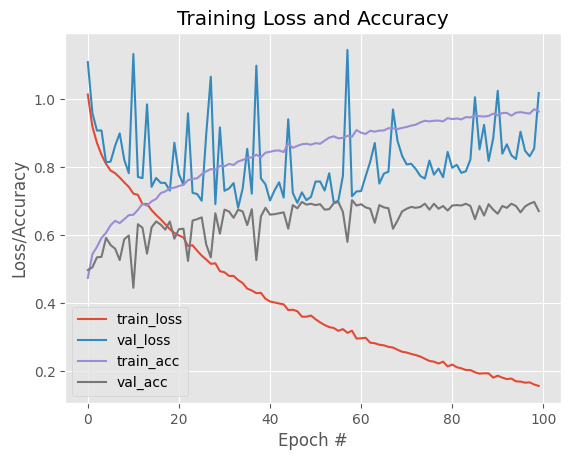

In [23]:
# plot training loss and accuracy
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.figure()
plt.plot(
    range(0, 100),
    history.history["loss"],
    label="train_loss"
)
plt.plot(
    range(0, 100),
    history.history["val_loss"],
    label="val_loss"
)
plt.plot(
    range(0, 100),
    history.history["accuracy"],
    label="train_acc"
)
plt.plot(
    range(0, 100),
    history.history["val_accuracy"],
    label="val_acc"
)
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

In [26]:
# save the model to disk
print("[INFO] serializing network...")
model.save(MODEL_DIR / 'shallownet_animals.keras')

[INFO] serializing network...
